In [1]:
import os, sys
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_churn = pd.read_csv('/content/Telcom Data.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
customer_churn['Churn'].value_counts()/(len(customer_churn))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
"""
churn_no = customer_churn[customer_churn['Churn']=='No']
churn_yes = customer_churn[customer_churn['Churn']=='Yes']
"""

"\nchurn_no = customer_churn[customer_churn['Churn']=='No']\nchurn_yes = customer_churn[customer_churn['Churn']=='Yes']\n"

In [ ]:
churn_no.shape, churn_yes.shape

((5174, 21), (1869, 21))

In [ ]:
# Handling by using oversampling method - Target - Minority class
churn_yes.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customer_churn['Churn'] = customer_churn['Churn'].replace({'Yes':1, 'No':0})

In [ ]:
customer_churn['Churn'].value_counts()/(len(customer_churn))*100

0    73.463013
1    26.536987
Name: Churn, dtype: float64

In [ ]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
customer_churn['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
customer_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
customer_churn['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
customer_churn['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [ ]:
customer_churn['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [ ]:
customer_churn['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [ ]:
customer_churn['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [ ]:
customer_churn['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [ ]:
customer_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
customer_churn['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [ ]:
customer_churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
customer_churn['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [ ]:
customer_churn['MonthlyCharges'].value_counts()

In [ ]:
customer_churn['TotalCharges'].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [ ]:
for i in customer_churn.columns:
    print("*******************************************************", i,
         "***********************************************************")
    print()
    print(set(customer_churn[i].tolist()))
    print()

******************************************************* customerID ***********************************************************

{'5955-EPOAZ', '2886-KEFUM', '4627-MIHJH', '2101-RANCD', '1705-GUHPV', '3569-EDBPQ', '2038-OEQZH', '0621-JFHOL', '9396-ZSFLL', '4646-QZXTF', '9402-CXWPL', '3995-WFCSM', '6510-UPNKS', '9137-UIYPG', '6549-BTYPG', '6434-TTGJP', '2446-BEGGB', '3023-GFLBR', '6614-FHDBO', '6599-GZWCM', '8879-ZKJOF', '6609-MXJHJ', '7524-VRLPL', '8644-XYTSV', '0487-CRLZF', '9823-EALYC', '9715-WZCLW', '8773-HHUOZ', '0224-HJAPT', '2740-TVLFN', '5387-ASZNZ', '2637-FKFSY', '0596-BQCEQ', '9770-KXGQU', '4403-BWPAY', '8224-IVVPA', '2197-OMWGI', '4077-HWUYD', '3518-FSTWG', '2560-PPCHE', '7817-OMJNA', '8780-YRMTT', '9668-PUGNU', '6959-GQEGV', '1839-UMACK', '8237-ULIXL', '7595-EHCDL', '0082-OQIQY', '2988-GBIVW', '2885-HIJDH', '3347-YJZZE', '8756-RDDLT', '9330-IJWIO', '9788-HNGUT', '6481-LXPWL', '4373-MAVJG', '7156-MHUGY', '3005-TYFRD', '4712-AUQZO', '7460-ITWWP', '2380-DAMQP', '1904-WAJAA', '73

In [ ]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(" ", np.nan)


In [ ]:
customer_churn.shape

(7043, 21)

In [ ]:
customer_churn = customer_churn[customer_churn['TotalCharges'].notnull()]

In [ ]:
customer_churn = customer_churn.reset_index()[customer_churn.columns]
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [ ]:
customer_churn.shape

(7032, 21)

In [ ]:
# customer_churn['TotalCharges'].mode()
# customer_churn['TotalCharges'] = customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].mode())

In [ ]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   gender_Male                            7032 non-null   uint8  
 7   Partner_Yes                            7032 non-null   uint8  
 8   Dependents_Yes                         7032 non-null   uint8  
 9   PhoneService_Yes                       7032 non-null   uint8  
 10  MultipleLines_No phone service         7032 non-null   uint8  
 11  Mult

In [ ]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
customer_churn = pd.get_dummies(customer_churn, columns=['gender','Partner','Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], drop_first=True )

In [ ]:
customer_churn.shape

(7032, 32)

In [ ]:
customer_churn.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


# Feature Scaling required

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['tenure','MonthlyCharges', 'TotalCharges']
customer_churn[scaler_columns] = scaler.fit_transform(customer_churn[scaler_columns])

In [ ]:
customer_churn.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,0.064303,-0.260878,-0.173740,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,-1.239504,-0.363923,-0.959649,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,0.512486,-0.747850,-0.195248,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,-1.239504,0.196178,-0.940457,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# split the data into independent variable and dependent variable
x = customer_churn.drop(['customerID','Churn'], axis=1)
y = customer_churn['Churn']

In [ ]:
x.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
# Handling imbalance problem - Target is Minority Class - SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print("***********"*10)
print(y_smote.value_counts())

0    5163
1    1869
Name: Churn, dtype: int64
**************************************************************************************************************
0    5163
1    5163
Name: Churn, dtype: int64


In [ ]:
print(x.shape)
print(x_smote.shape)

(7032, 30)
(10326, 30)


In [ ]:
print(y.shape)
print(y_smote.shape)

(7032,)
(10326,)


In [ ]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, 
                                                    random_state=101)

In [ ]:
# Pandas Profilling
from pandas_profiling import ProfileReport
reports = ProfileReport(customer_churn)
reports.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_logit_train = logit.predict(x_train)
y_pred_logit_test = logit.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(classification_report(y_train, y_pred_logit_train))
print("********************"*10)
print(classification_report(y_test, y_pred_logit_test))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3611
           1       0.78      0.84      0.81      3617

    accuracy                           0.80      7228
   macro avg       0.81      0.80      0.80      7228
weighted avg       0.81      0.80      0.80      7228

********************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1552
           1       0.78      0.85      0.81      1546

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098



In [ ]:
print(accuracy_score(y_train, y_pred_logit_train))
print("********************"*10)
print(accuracy_score(y_test, y_pred_logit_test))

0.8042335362479247
********************************************************************************************************************************************************************************************************
0.8040671400903809


In [ ]:
customer_churn.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
customer_churn['customerID'].value_counts()

7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64

In [ ]:
x_test.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
customer_churn['probability1'] = logit.predict_proba(customer_churn[x_test.columns])[:,0]

In [ ]:
customer_churn

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,probability,probability1
0,7590-VHVEG,0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0.762849,0.237151
1,5575-GNVDE,0,0.064303,-0.260878,-0.173740,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0.119737,0.880263
2,3668-QPYBK,0,-1.239504,-0.363923,-0.959649,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0.321127,0.678873
3,7795-CFOCW,0,0.512486,-0.747850,-0.195248,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0.100386,0.899614
4,9237-HQITU,0,-1.239504,0.196178,-0.940457,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0.902743,0.097257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,-0.343137,0.664868,-0.129180,0,1,1,1,1,...,0,1,1,0,1,0,0,1,0.085621,0.914379
7028,2234-XADUH,0,1.612573,1.276493,2.241056,0,0,1,1,1,...,0,1,1,0,1,1,0,0,0.154954,0.845046
7029,4801-JZAZL,0,-0.872808,-1.170004,-0.854514,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0.531942,0.468058
7030,8361-LTMKD,1,-1.158016,0.319168,-0.872095,1,1,1,0,1,...,0,0,0,0,1,0,0,1,0.712830,0.287170


In [ ]:
customer_churn['probability'] = logit.predict_proba(customer_churn[x_test.columns])[:,1]

In [ ]:
customer_churn.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,probability
0,7590-VHVEG,0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0.762849
1,5575-GNVDE,0,0.064303,-0.260878,-0.173740,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0.119737
2,3668-QPYBK,0,-1.239504,-0.363923,-0.959649,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0.321127
3,7795-CFOCW,0,0.512486,-0.747850,-0.195248,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0.100386
4,9237-HQITU,0,-1.239504,0.196178,-0.940457,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0.902743


In [ ]:
customer_churn[['customerID','probability']].tail(20)

,customerID,probability
7012,1035-IPQPU,0.590967
7013,7398-LXGYX,0.305426
7014,2823-LKABH,0.794764
7015,8775-CEBBJ,0.700468
7016,0550-DCXLH,0.280602
7017,9281-CEDRU,0.017895
7018,2235-DWLJU,0.852886
7019,0871-OPBXW,0.483208
7020,3605-JISKB,0.018332
7021,6894-LFHLY,0.875468


In [ ]:
# pycaret package - automation package

In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

In [4]:
from pycaret.classification import *

In [6]:
classification = setup(data=customer_churn, target='Churn', session_id=123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 42)"
6,Transformed train set shape,"(4930, 42)"
7,Transformed test set shape,"(2113, 42)"
8,Ordinal features,5
9,Numeric features,3


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8030,0.8480,0.5337,0.6600,0.5895,0.4620,0.4669,1.0550
ridge,Ridge Classifier,0.8006,0.0000,0.5069,0.6652,0.5746,0.4475,0.4551,0.7300
gbc,Gradient Boosting Classifier,0.8004,0.8492,0.5215,0.6567,0.5803,0.4518,0.4576,1.3560
lr,Logistic Regression,0.8002,0.8439,0.5367,0.6527,0.5882,0.4580,0.4624,1.4820
lda,Linear Discriminant Analysis,0.7959,0.8404,0.6026,0.6269,0.6098,0.4727,0.4764,0.5740
lightgbm,Light Gradient Boosting Machine,0.7941,0.8336,0.5283,0.6364,0.5762,0.4420,0.4461,0.7730
rf,Random Forest Classifier,0.7882,0.8133,0.4893,0.6313,0.5504,0.4149,0.4212,1.6090
xgboost,Extreme Gradient Boosting,0.7870,0.8255,0.5284,0.6151,0.5673,0.4274,0.4303,1.4220
knn,K Neighbors Classifier,0.7728,0.7777,0.5162,0.5821,0.5460,0.3955,0.3975,0.7940
et,Extra Trees Classifier,0.7609,0.7825,0.4442,0.5640,0.4960,0.3424,0.3471,1.8280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)

In [8]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7931,0.8437,0.5692,0.6167,0.5920,0.4537,0.4544
1,0.8093,0.8339,0.5615,0.6636,0.6083,0.4835,0.4864
2,0.7830,0.8206,0.4733,0.6200,0.5368,0.3984,0.4046
3,0.8073,0.8421,0.5115,0.6837,0.5852,0.4630,0.4713
4,0.7890,0.8281,0.5115,0.6262,0.5630,0.4258,0.4296
5,0.7972,0.8420,0.5267,0.6449,0.5798,0.4479,0.4519
6,0.8195,0.8744,0.5725,0.6944,0.6276,0.5099,0.5141
7,0.7951,0.8574,0.5191,0.6415,0.5738,0.4410,0.4452
8,0.8256,0.8726,0.5878,0.7064,0.6417,0.5277,0.5316


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
tuned_ada = tune_model(adaboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7931,0.8473,0.5923,0.6111,0.6016,0.4619,0.4620
1,0.8093,0.8355,0.5615,0.6636,0.6083,0.4835,0.4864
2,0.7890,0.8246,0.4809,0.6364,0.5478,0.4137,0.4206
3,0.7992,0.8385,0.5115,0.6569,0.5751,0.4463,0.4523
4,0.7911,0.8281,0.5191,0.6296,0.5690,0.4328,0.4363
5,0.8012,0.8419,0.5344,0.6542,0.5882,0.4590,0.4631
6,0.8134,0.8726,0.5573,0.6822,0.6134,0.4921,0.4965
7,0.7931,0.8570,0.4962,0.6436,0.5603,0.4280,0.4342
8,0.8316,0.8771,0.5954,0.7222,0.6527,0.5430,0.5474


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

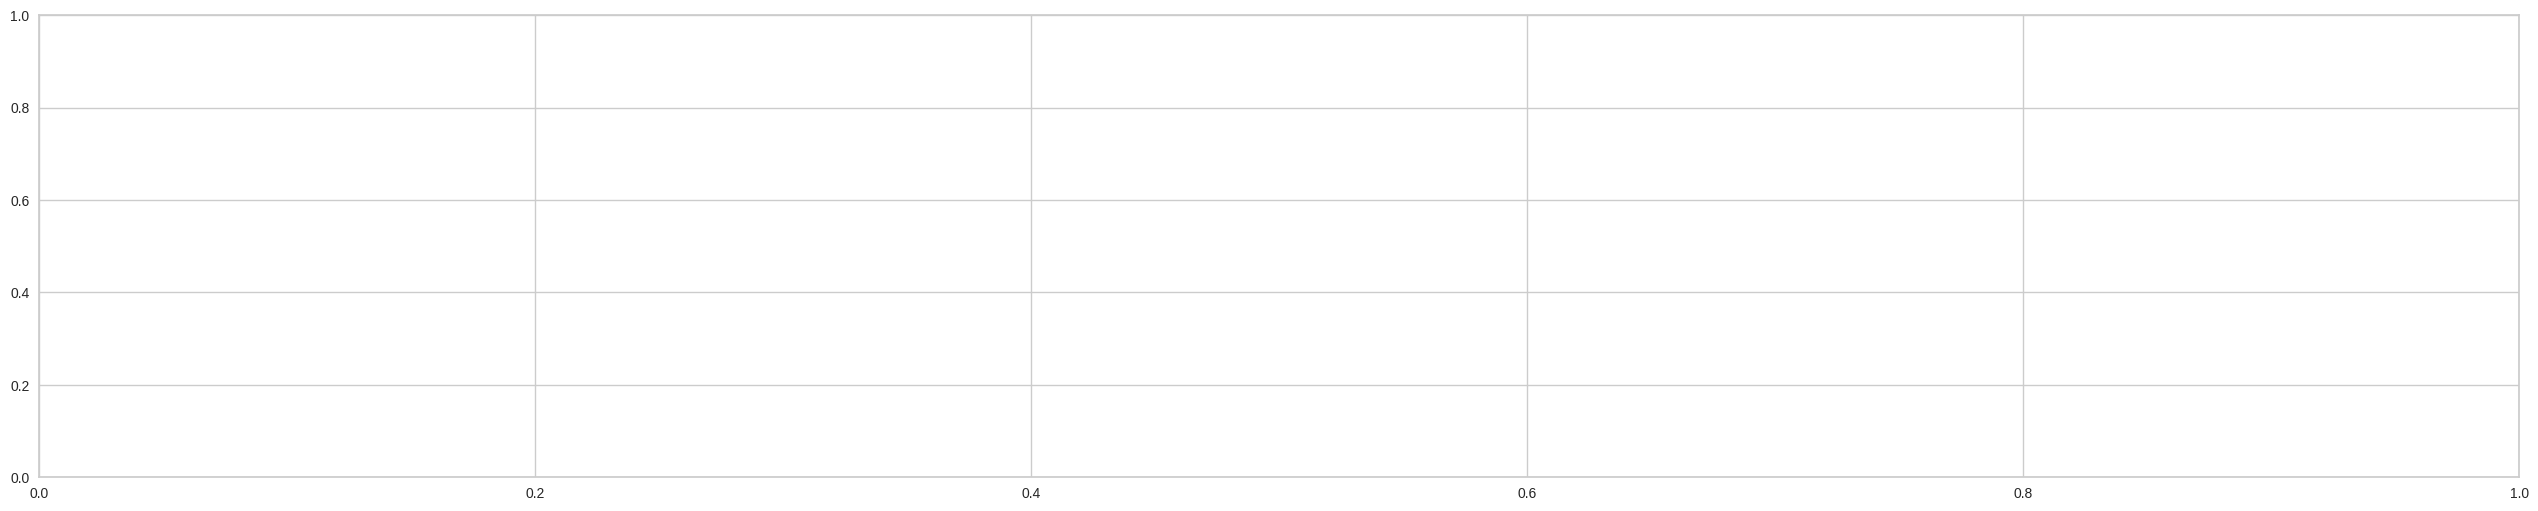

In [10]:
evaluate_model(tuned_ada)

In [ ]:
# https://pycaret.org/
# https://pycaret.readthedocs.io/en/stable/#

In [ ]:
x = np.arange(0,100)
y = np.arange(0,100)

In [ ]:
x.shape

(100,)

In [ ]:
x1 = x.reshape(-1,1)

In [ ]:
x1.shape

(100, 1)

In [ ]:
x1.ndim

2

In [ ]:
x2 = x.reshape(1,-1)

In [ ]:
x2.ndim, x2.shape

(2, (1, 100))